In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from imblearn.over_sampling import SMOTE
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA

In [ ]:
data = pd.read_csv('waterQuality.csv')

This is a set of data created from imaginary data of water quality in an urban environment. The aim of this project was to classify the database in such a way as to check which water is drinkable and which is not.

* aluminium - dangerous if greater than 2.8
* ammonia - dangerous if greater than 32.5
* arsenic - dangerous if greater than 0.01
* barium - dangerous if greater than 2
* cadmium - dangerous if greater than 0.005
* chloramine - dangerous if greater than 4
* chromium - dangerous if greater than 0.1
* copper - dangerous if greater than 1.3
* flouride - dangerous if greater than 1.5
* bacteria - dangerous if greater than 0
* viruses - dangerous if greater than 0
* lead - dangerous if greater than 0.015
* nitrates - dangerous if greater than 10
* nitrites - dangerous if greater than 1
* mercury - dangerous if greater than 0.002
* perchlorate - dangerous if greater than 56
* radium - dangerous if greater than 5
* selenium - dangerous if greater than 0.5
* silver - dangerous if greater than 0.1
* uranium - dangerous if greater than 0.3
* is_safe - class attribute {0 - not safe, 1 - safe}

Preparing my dataset

In [ ]:
#deleting rows if there are any with missing values

data = data.dropna()
print(data.shape)

(7999, 21)


In [ ]:
#deleting column ammonia because it was causing errors 
columns_to_drop = ['ammonia']
data.drop(columns=columns_to_drop, inplace=True)

In [ ]:
#checking if there are any empty values
print(data.isnull().sum())
print(data.isnull().values.any())

aluminium      0
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        0
dtype: int64
False


In [ ]:
#analyzing range of values for each column
for column in data.columns:
    print(f"Range of values for {column}: {data[column].min()} - {data[column].max()}")

Range of values for aluminium: 0.0 - 5.05
Range of values for arsenic: 0.0 - 1.05
Range of values for barium: 0.0 - 4.94
Range of values for cadmium: 0.0 - 0.13
Range of values for chloramine: 0.0 - 8.68
Range of values for chromium: 0.0 - 0.9
Range of values for copper: 0.0 - 2.0
Range of values for flouride: 0.0 - 1.5
Range of values for bacteria: 0.0 - 1.0
Range of values for viruses: 0.0 - 1.0
Range of values for lead: 0.0 - 0.2
Range of values for nitrates: 0.0 - 19.83
Range of values for nitrites: 0.0 - 2.93
Range of values for mercury: 0.0 - 0.01
Range of values for perchlorate: 0.0 - 60.01
Range of values for radium: 0.0 - 7.99
Range of values for selenium: 0.0 - 0.1
Range of values for silver: 0.0 - 0.5
Range of values for uranium: 0.0 - 0.09
Range of values for is_safe: #NUM! - 1


In [ ]:
data = data.drop(data[data['is_safe'] == '#NUM!'].index)
print(data.shape)

(7996, 20)


In [ ]:
data['is_safe'].unique()

array([1., 0.])

In [ ]:
#Performing oversampling

data['is_safe'] = data['is_safe'].astype(float)

# Separate features (X) and class labels (y)
X = data.drop('is_safe', axis=1)
y = data['is_safe']

# Identify the minority class (safe)
minority_class = X[y == 1.0]

# Perform SMOTE oversampling
smote = SMOTE(sampling_strategy={1.0: 6000})
X_oversampled, y_oversampled = smote.fit_resample(X, y)
data = pd.concat([X_oversampled, y_oversampled], axis=1)

In [ ]:
data.tail()

,aluminium,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
13079,2.494096,0.015378,1.824308,0.006540,4.282924,0.487567,0.253519,1.162163,0.549183,0.463552,0.114268,7.352692,1.574587,0.001460,35.120317,3.367586,0.037298,0.205942,0.020000,1.0
13080,3.585643,0.026956,0.921306,0.002565,3.615660,0.309999,1.551308,0.926955,0.239133,0.239133,0.186956,16.924792,1.351740,0.004130,4.585650,4.650436,0.051304,0.319564,0.032609,1.0
13081,2.965401,0.001603,2.588664,0.008000,1.420717,0.352630,1.692321,1.322475,0.976695,0.974761,0.064114,16.981561,1.180520,0.002985,27.288368,2.459465,0.068917,0.253404,0.001238,1.0
13082,3.230200,0.013013,3.303476,0.003603,3.812121,0.654934,1.078144,0.552318,0.117517,0.002411,0.090649,14.335166,1.531390,0.002109,10.453408,6.681258,0.072053,0.164239,0.060000,1.0
13083,0.501241,0.039051,2.791314,0.005620,5.489049,0.779270,0.967226,0.593431,0.092992,0.092992,0.078657,15.673503,1.783285,0.004474,9.030584,1.022993,0.060000,0.379124,0.025693,1.0


In [ ]:
#analyzing range of values for each column
for column in data.columns:
    print(f"Range of values for {column}: {data[column].min()} - {data[column].max()}")

Range of values for aluminium: 0.0 - 5.05
Range of values for arsenic: 0.0 - 1.05
Range of values for barium: 0.0 - 4.94
Range of values for cadmium: 0.0 - 0.13
Range of values for chloramine: 0.0 - 8.68
Range of values for chromium: 0.0 - 0.9
Range of values for copper: 0.0 - 2.0
Range of values for flouride: 0.0 - 1.5
Range of values for bacteria: 0.0 - 1.0
Range of values for viruses: 0.0 - 1.0
Range of values for lead: 0.0 - 0.2
Range of values for nitrates: 0.0 - 19.83
Range of values for nitrites: 0.0 - 2.93
Range of values for mercury: 0.0 - 0.01
Range of values for perchlorate: 0.0 - 60.01
Range of values for radium: 0.0 - 7.99
Range of values for selenium: 0.0 - 0.1
Range of values for silver: 0.0 - 0.5
Range of values for uranium: 0.0 - 0.09
Range of values for is_safe: 0.0 - 1.0


<Axes: >

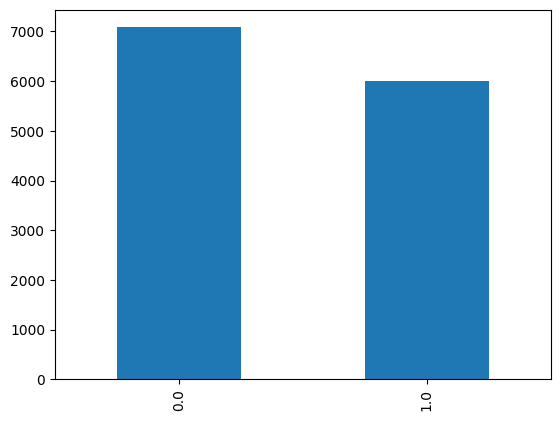

In [ ]:
#plotting the amount of rounds won by each team
data['is_safe'].value_counts().plot.bar()

Preprocessing bazy danych

Tworzymy dwie wersje bazy, jedną bardziej drugą mniej przetworzoną

In [ ]:
less_Processed_data = data.copy()
more_Processed_data = data.copy()

In [ ]:
#normalization values so there are in range from 1 to 0
scaler = MinMaxScaler()

scaler.fit(more_Processed_data)

df_scaled = scaler.transform(more_Processed_data)

more_Processed_data = pd.DataFrame(df_scaled, columns=more_Processed_data.columns)

more_Processed_data.head()

,aluminium,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,0.326733,0.038095,0.576923,0.053846,0.040323,0.922222,0.085,0.033333,0.20,0.000,0.270,0.810893,0.385666,0.7,0.629062,0.848561,0.8,0.68,0.222222,1.0
1,0.459406,0.009524,0.670040,0.015385,0.608295,0.755556,0.330,0.600000,0.65,0.650,0.500,0.101362,0.658703,0.3,0.537577,0.401752,0.8,0.54,0.555556,1.0
2,0.200000,0.038095,0.117409,0.061538,0.488479,0.588889,0.010,0.660000,0.05,0.003,0.390,0.714070,0.378840,0.6,0.837860,0.884856,0.7,0.88,0.111111,0.0
3,0.269307,0.038095,0.599190,0.007692,0.832949,0.033333,0.830,0.720000,0.71,0.710,0.080,0.071104,0.440273,0.4,0.151975,0.215269,0.2,0.90,0.555556,1.0
4,0.182178,0.028571,0.040486,0.046154,0.307604,0.766667,0.285,0.406667,0.13,0.001,0.585,0.339889,0.378840,0.3,0.281620,0.301627,0.2,0.12,0.222222,1.0


In [ ]:
X_more = more_Processed_data.values[:, :-1]
y_more = more_Processed_data.values[:, -1]

#reduction of features
pca = PCA(n_components=8)
pca.fit(X_more)

# print(pca.explained_variance_ratio_)

X_more = pca.transform(X_more)

X_less = less_Processed_data.values[:, :-1]
y_less = less_Processed_data.values[:, -1]

In [ ]:
Xmore_train, Xmore_test, ymore_train, ymore_test = train_test_split(X_more, y_more, train_size=0.7, random_state=278824)
Xless_train, Xless_test, yless_train, yless_test = train_test_split(X_less, y_less, train_size=0.7, random_state=278824)

[Text(0.4616414763202012, 0.9833333333333333, 'x[0] <= 0.21\ngini = 0.496\nsamples = 9158\nvalue = [4977, 4181]'),
 Text(0.1747170997485331, 0.95, 'x[9] <= 0.498\ngini = 0.284\nsamples = 4782\nvalue = [3962, 820]'),
 Text(0.11745599329421626, 0.9166666666666666, 'x[12] <= 1.046\ngini = 0.379\nsamples = 2808\nvalue = [2094, 714]'),
 Text(0.07711651299245599, 0.8833333333333333, 'x[11] <= 10.12\ngini = 0.49\nsamples = 1122\nvalue = [639, 483]'),
 Text(0.04945515507124895, 0.85, 'x[10] <= 0.149\ngini = 0.471\nsamples = 709\nvalue = [269, 440]'),
 Text(0.04610226320201174, 0.8166666666666667, 'x[8] <= 0.037\ngini = 0.43\nsamples = 641\nvalue = [201, 440]'),
 Text(0.03436714165968147, 0.7833333333333333, 'x[6] <= 1.275\ngini = 0.342\nsamples = 534\nvalue = [117, 417]'),
 Text(0.03101424979044426, 0.75, 'x[2] <= 2.015\ngini = 0.312\nsamples = 517\nvalue = [100, 417]'),
 Text(0.027661357921207042, 0.7166666666666667, 'x[15] <= 4.595\ngini = 0.283\nsamples = 503\nvalue = [86, 417]'),
 Text(0.0

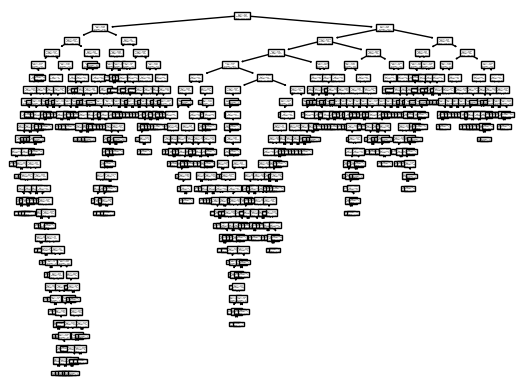

In [ ]:
#tree classifier
clf = tree.DecisionTreeClassifier()
clf = clf.fit(Xless_train, yless_train)

tree.plot_tree(clf)

In [ ]:
#accuracy of the tree classifier
clf.score(Xless_test, yless_test)

0.9421803362200714

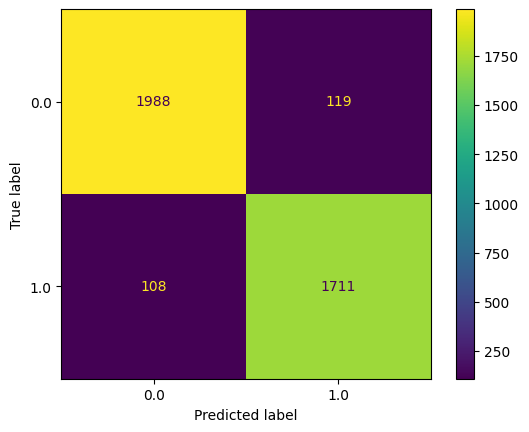

In [ ]:
#confusion matrix
predictions = clf.predict(Xless_test)
cm = confusion_matrix(yless_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

[Text(0.5, 0.875, 'x[0] <= 0.21\ngini = 0.496\nsamples = 9158\nvalue = [4977, 4181]'),
 Text(0.25, 0.625, 'x[9] <= 0.498\ngini = 0.284\nsamples = 4782\nvalue = [3962, 820]'),
 Text(0.125, 0.375, 'x[12] <= 1.046\ngini = 0.379\nsamples = 2808\nvalue = [2094, 714]'),
 Text(0.0625, 0.125, 'gini = 0.49\nsamples = 1122\nvalue = [639, 483]'),
 Text(0.1875, 0.125, 'gini = 0.236\nsamples = 1686\nvalue = [1455, 231]'),
 Text(0.375, 0.375, 'x[4] <= 1.1\ngini = 0.102\nsamples = 1974\nvalue = [1868, 106]'),
 Text(0.3125, 0.125, 'gini = 0.008\nsamples = 1315\nvalue = [1310, 5]'),
 Text(0.4375, 0.125, 'gini = 0.26\nsamples = 659\nvalue = [558, 101]'),
 Text(0.75, 0.625, 'x[1] <= 0.18\ngini = 0.356\nsamples = 4376\nvalue = [1015, 3361]'),
 Text(0.625, 0.375, 'x[14] <= 40.515\ngini = 0.21\nsamples = 3456\nvalue = [412, 3044]'),
 Text(0.5625, 0.125, 'gini = 0.124\nsamples = 2976\nvalue = [197, 2779]'),
 Text(0.6875, 0.125, 'gini = 0.495\nsamples = 480\nvalue = [215, 265]'),
 Text(0.875, 0.375, 'x[17] <=

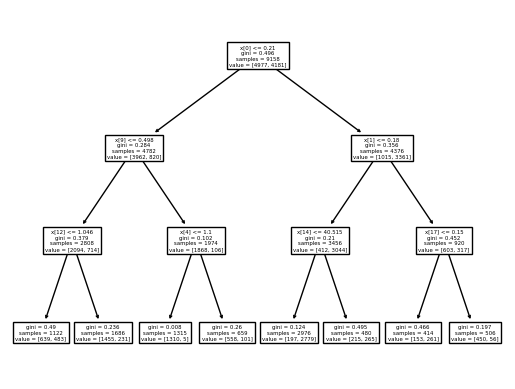

In [ ]:
#tree classifier with max depth of 3
clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(Xless_train, yless_train)

tree.plot_tree(clf)

In [ ]:
#accuracy of the tree classifier
clf.score(Xless_test, yless_test)

0.8390219052470708

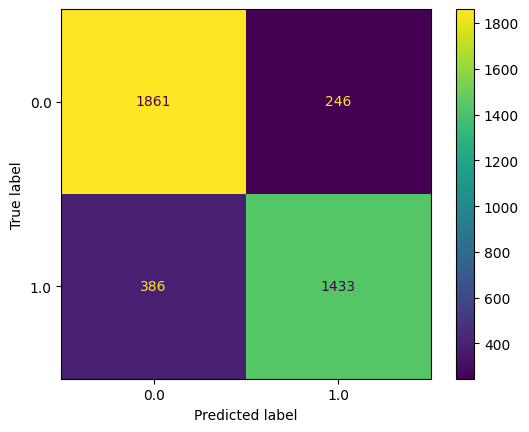

In [ ]:
#confusion matrix
predictions = clf.predict(Xless_test)
cm = confusion_matrix(yless_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

[Text(0.46070207174163236, 0.9807692307692307, 'x[0] <= -0.303\ngini = 0.496\nsamples = 9158\nvalue = [4977, 4181]'),
 Text(0.12527230582188226, 0.9423076923076923, 'x[1] <= -0.241\ngini = 0.282\nsamples = 3201\nvalue = [2657, 544]'),
 Text(0.07595736994219653, 0.9038461538461539, 'x[0] <= -0.722\ngini = 0.485\nsamples = 1137\nvalue = [666, 471]'),
 Text(0.036100126336921536, 0.8653846153846154, 'x[4] <= -0.175\ngini = 0.489\nsamples = 669\nvalue = [284, 385]'),
 Text(0.005538056834308262, 0.8269230769230769, 'x[4] <= -0.308\ngini = 0.31\nsamples = 99\nvalue = [80, 19]'),
 Text(0.00443044546744661, 0.7884615384615384, 'gini = 0.0\nsamples = 44\nvalue = [44, 0]'),
 Text(0.0066456682011699145, 0.7884615384615384, 'x[3] <= -0.044\ngini = 0.452\nsamples = 55\nvalue = [36, 19]'),
 Text(0.00443044546744661, 0.75, 'x[2] <= 0.177\ngini = 0.485\nsamples = 29\nvalue = [12, 17]'),
 Text(0.0033228341005849572, 0.7115384615384616, 'x[1] <= -0.272\ngini = 0.435\nsamples = 25\nvalue = [8, 17]'),
 Tex

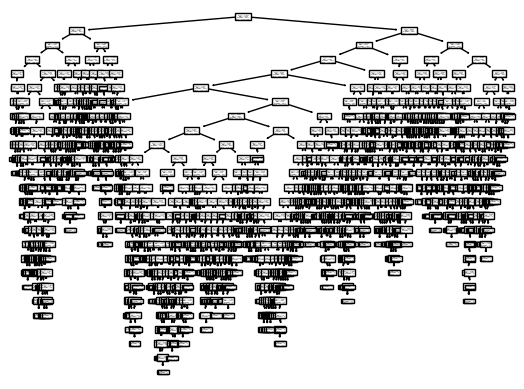

In [ ]:
#tree classifier
clf = tree.DecisionTreeClassifier()
clf = clf.fit(Xmore_train, ymore_train)

tree.plot_tree(clf)

In [ ]:
#accuracy of the tree classifier
clf.score(Xmore_test, ymore_test)

0.8247580234335201

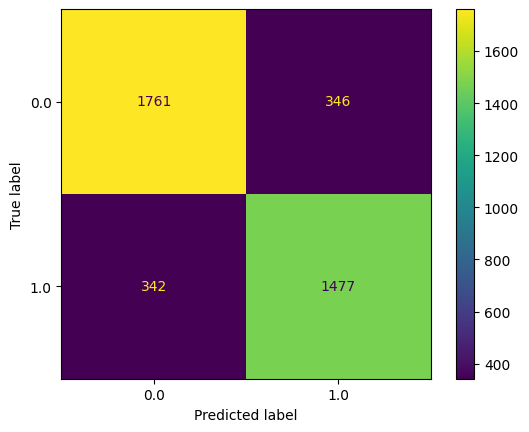

In [ ]:
#confusion matrix
predictions = clf.predict(Xmore_test)
cm = confusion_matrix(ymore_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

[Text(0.5, 0.875, 'x[0] <= -0.303\ngini = 0.496\nsamples = 9158\nvalue = [4977, 4181]'),
 Text(0.25, 0.625, 'x[1] <= -0.241\ngini = 0.282\nsamples = 3201\nvalue = [2657, 544]'),
 Text(0.125, 0.375, 'x[0] <= -0.722\ngini = 0.485\nsamples = 1137\nvalue = [666, 471]'),
 Text(0.0625, 0.125, 'gini = 0.489\nsamples = 669\nvalue = [284, 385]'),
 Text(0.1875, 0.125, 'gini = 0.3\nsamples = 468\nvalue = [382, 86]'),
 Text(0.375, 0.375, 'x[1] <= -0.189\ngini = 0.068\nsamples = 2064\nvalue = [1991, 73]'),
 Text(0.3125, 0.125, 'gini = 0.215\nsamples = 310\nvalue = [272, 38]'),
 Text(0.4375, 0.125, 'gini = 0.039\nsamples = 1754\nvalue = [1719, 35]'),
 Text(0.75, 0.625, 'x[2] <= 0.187\ngini = 0.476\nsamples = 5957\nvalue = [2320, 3637]'),
 Text(0.625, 0.375, 'x[1] <= 0.701\ngini = 0.401\nsamples = 4301\nvalue = [1193, 3108]'),
 Text(0.5625, 0.125, 'gini = 0.369\nsamples = 3974\nvalue = [970, 3004]'),
 Text(0.6875, 0.125, 'gini = 0.434\nsamples = 327\nvalue = [223, 104]'),
 Text(0.875, 0.375, 'x[4] <=

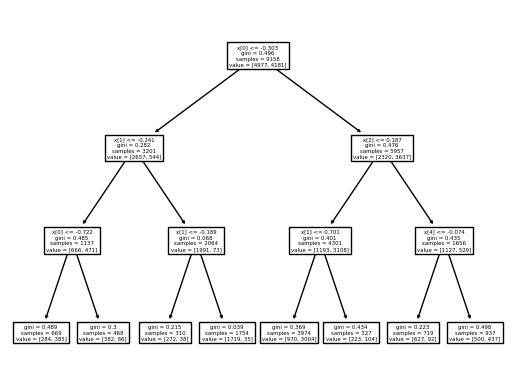

In [ ]:
#tree classifier with max depth of 3
clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(Xmore_train, ymore_train)

tree.plot_tree(clf)

In [ ]:
#accuracy of the tree classifier
clf.score(Xmore_test, ymore_test)

0.7559857361181864

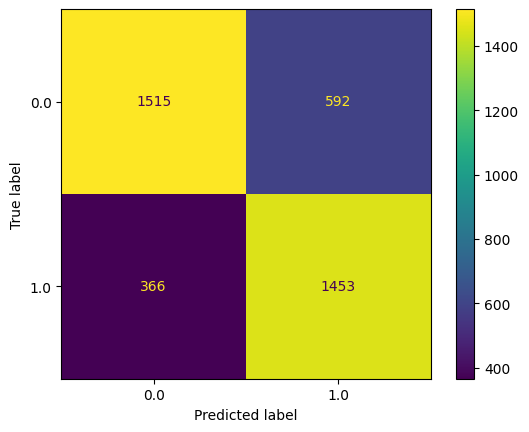

In [ ]:
#confusion matrix
predictions = clf.predict(Xmore_test)
cm = confusion_matrix(ymore_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

In [ ]:
#bayes classifier
model = GaussianNB()
model.fit(Xless_train, yless_train)
model.score(Xless_test, yless_test)

0.7888436067244015

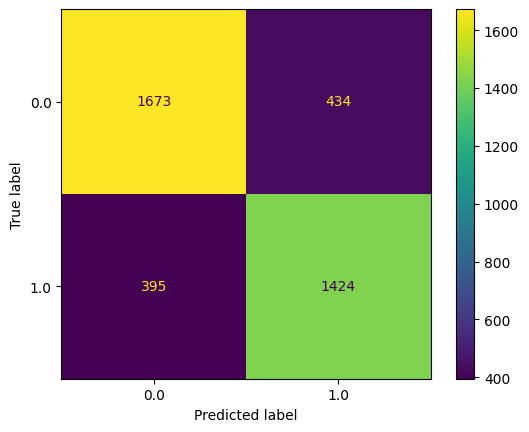

In [ ]:
#confusion matrix
predictions = model.predict(Xless_test)
cm = confusion_matrix(yless_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

In [ ]:
#bayes classifier
model = GaussianNB()
model.fit(Xmore_train, ymore_train)
model.score(Xmore_test, ymore_test)

0.7776362710137544

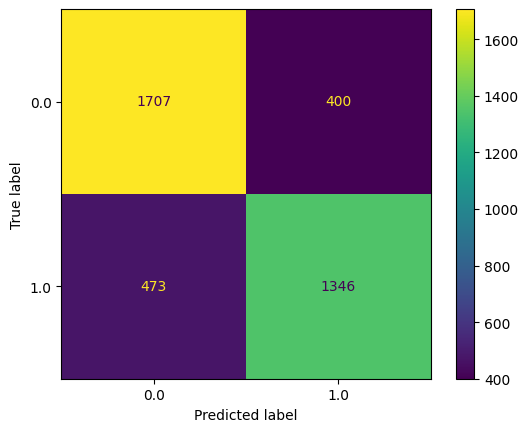

In [ ]:
#confusion matrix
predictions = model.predict(Xmore_test)
cm = confusion_matrix(ymore_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

In [ ]:
#k nearest neighbors classifier with 3 neighbors
knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn.fit(Xless_train, yless_train)
knn.score(Xless_test, yless_test)

0.869332654100866

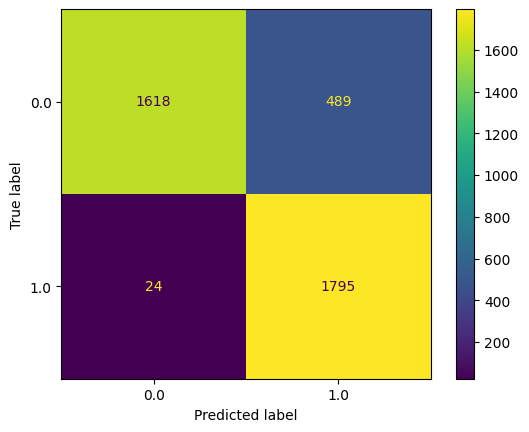

In [ ]:
#confusion matrix
predictions = knn.predict(Xless_test)
cm = confusion_matrix(yless_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

In [ ]:
#k nearest neighbors classifier with 5 neighbors
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(Xless_train, yless_train)
knn.score(Xless_test, yless_test)

0.8530310748853795

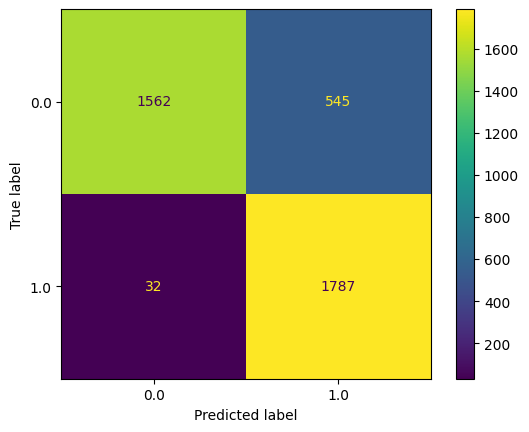

In [ ]:
#confusion matrix
predictions = knn.predict(Xless_test)
cm = confusion_matrix(yless_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

In [ ]:
#k nearest neighbors classifier with 11 neighbors
knn = KNeighborsClassifier(n_neighbors=11, metric='euclidean')
knn.fit(Xless_train, yless_train)
knn.score(Xless_test, yless_test)

0.8199184921039225

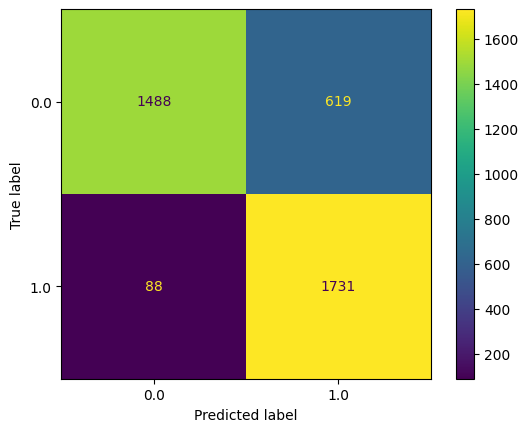

In [ ]:
#confusion matrix
predictions = knn.predict(Xless_test)
cm = confusion_matrix(yless_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

In [ ]:
#k nearest neighbors classifier with 3 neighbors
knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn.fit(Xmore_train, ymore_train)
knn.score(Xmore_test, ymore_test)

0.8680590932246561

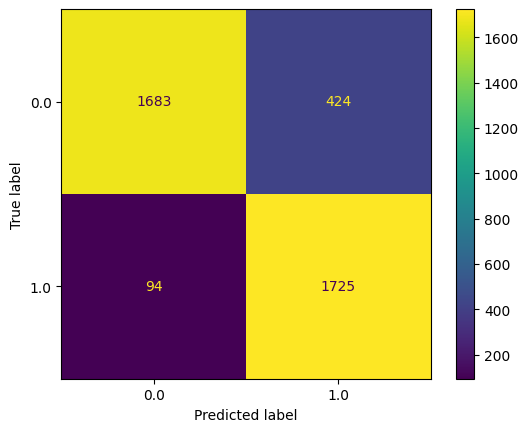

In [ ]:
#confusion matrix
predictions = knn.predict(Xmore_test)
cm = confusion_matrix(ymore_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

In [ ]:
#k nearest neighbors classifier with 5 neighbors
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(Xmore_train, ymore_train)
knn.score(Xmore_test, ymore_test)

0.8571064696892512

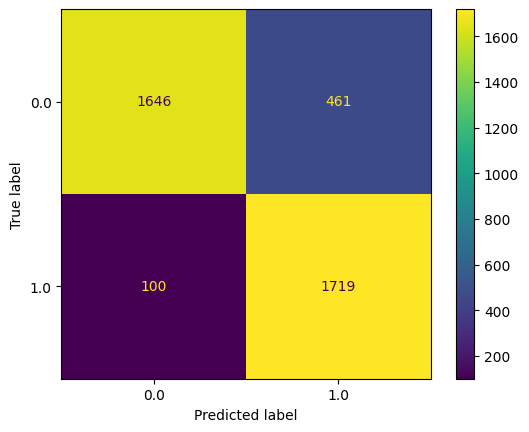

In [ ]:
#confusion matrix
predictions = knn.predict(Xmore_test)
cm = confusion_matrix(ymore_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

In [ ]:
#k nearest neighbors classifier with 11 neighbors
knn = KNeighborsClassifier(n_neighbors=11, metric='euclidean')
knn.fit(Xmore_train, ymore_train)
knn.score(Xmore_test, ymore_test)

0.8565970453387672

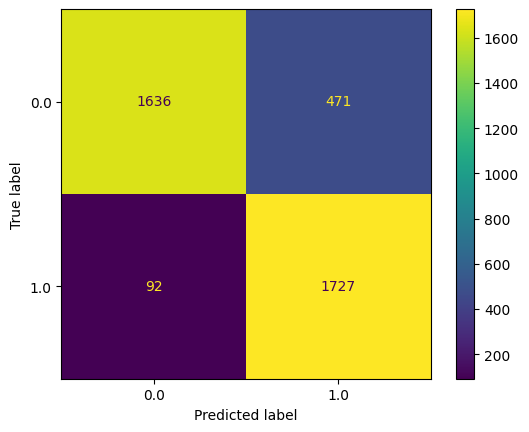

In [ ]:
#confusion matrix
predictions = knn.predict(Xmore_test)
cm = confusion_matrix(ymore_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

siec neuronowa

accuracy:  0.9032093734080489


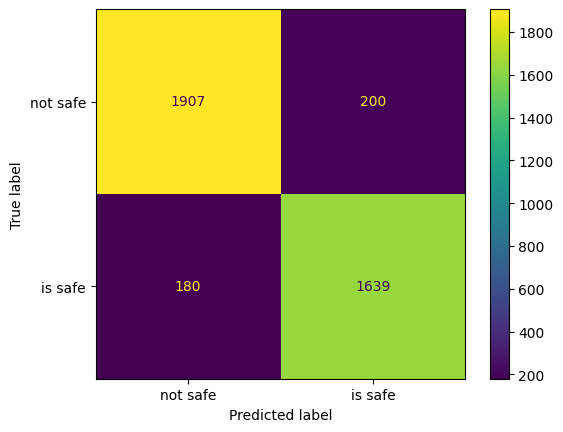

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(10,10,10), max_iter=500, activation='relu', solver='adam')

mlp.fit(Xless_train, yless_train)

pred = mlp.predict(Xless_test)

print("accuracy: ", accuracy_score(pred, yless_test))

LPneuronCM = confusion_matrix(yless_test, pred)
LPdispNeuron = ConfusionMatrixDisplay(confusion_matrix=LPneuronCM, display_labels=['not safe', 'is safe'])
LPdispNeuron.plot()

accuracy:  0.8553234844625573


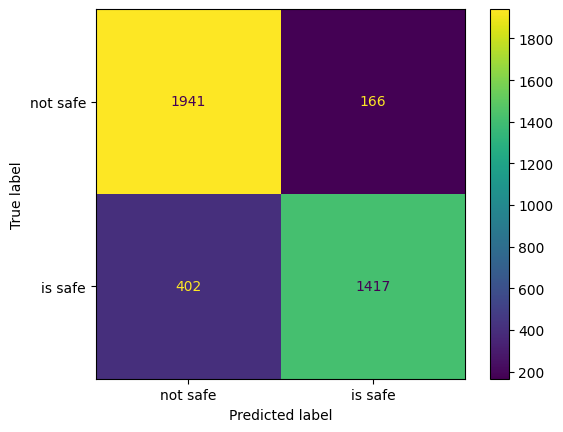

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(10,5,3), max_iter=1000, activation='tanh', solver='sgd')

mlp.fit(Xless_train, yless_train)

pred = mlp.predict(Xless_test)

print("accuracy: ", accuracy_score(pred, yless_test))

LPneuronCM = confusion_matrix(yless_test, pred)
LPdispNeuron = ConfusionMatrixDisplay(confusion_matrix=LPneuronCM, display_labels=['not safe', 'is safe'])
LPdispNeuron.plot()

accuracy:  0.9251146204788588


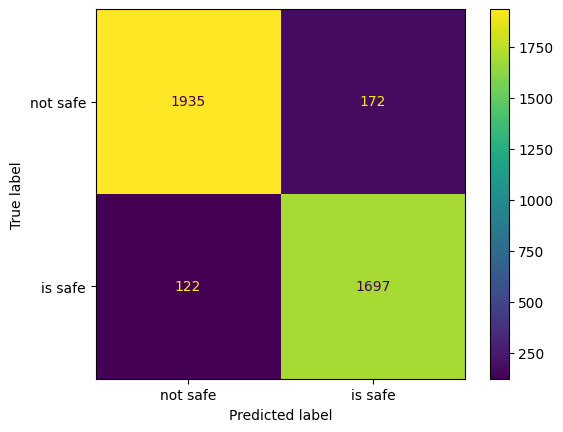

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(15,15,10,5), max_iter=700, activation='logistic', solver='adam')

mlp.fit(Xless_train, yless_train)

pred = mlp.predict(Xless_test)

print("accuracy: ", accuracy_score(pred, yless_test))

LPneuronCM = confusion_matrix(yless_test, pred)
LPdispNeuron = ConfusionMatrixDisplay(confusion_matrix=LPneuronCM, display_labels=['not safe', 'is safe'])
LPdispNeuron.plot()

accuracy:  0.8499745287824758


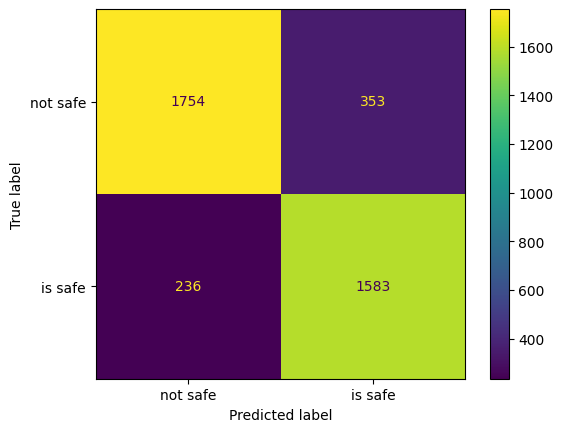

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(10,10,10), max_iter=500, activation='relu', solver='adam')

mlp.fit(Xmore_train, ymore_train)

pred = mlp.predict(Xmore_test)

print("accuracy: ", accuracy_score(pred, ymore_test))

LPneuronCM = confusion_matrix(ymore_test, pred)
LPdispNeuron = ConfusionMatrixDisplay(confusion_matrix=LPneuronCM, display_labels=['not safe', 'is safe'])
LPdispNeuron.plot()

accuracy:  0.8392766174223127


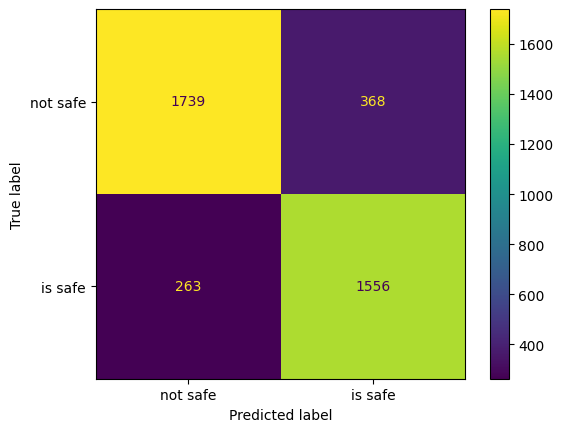

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(10,5,3), max_iter=1000, activation='tanh', solver='sgd')

mlp.fit(Xmore_train, ymore_train)

pred = mlp.predict(Xmore_test)

print("accuracy: ", accuracy_score(pred, ymore_test))

LPneuronCM = confusion_matrix(ymore_test, pred)
LPdispNeuron = ConfusionMatrixDisplay(confusion_matrix=LPneuronCM, display_labels=['not safe', 'is safe'])
LPdispNeuron.plot()

accuracy:  0.8507386653082017


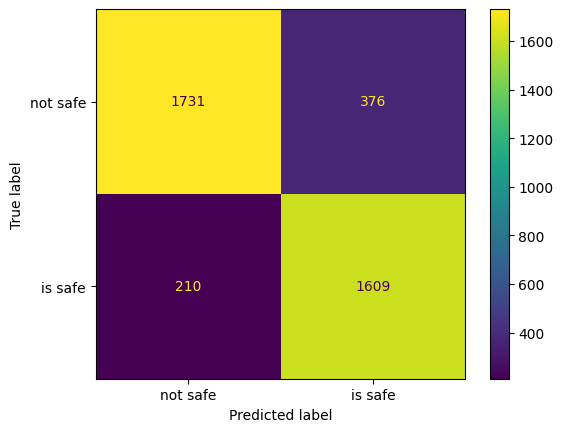

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(15,15,10,5), max_iter=700, activation='logistic', solver='adam')

mlp.fit(Xmore_train, ymore_train)

pred = mlp.predict(Xmore_test)

print("accuracy: ", accuracy_score(pred, ymore_test))

LPneuronCM = confusion_matrix(ymore_test, pred)
LPdispNeuron = ConfusionMatrixDisplay(confusion_matrix=LPneuronCM, display_labels=['not safe', 'is safe'])
LPdispNeuron.plot()

Bibliography:
* https://www.kaggle.com/datasets/mssmartypants/water-quality?resource=download
* https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/
